# Project I (Well Log Analysis in Python)

## Outline of Discussion 

### Well log plots and Well log modification
* Loading Well Data for section A
* Data summary (Summary statistics)
* Identification of gaps in the data
  * Barplots
  * Matrixplots
  * Heatmap
* Setting up the logplot
* Customizing the Log Plot

### Conclusion and Next steps !
* Further Data Modifications

..

## Well log plots and Well log modification

### Loading Well Data for section A

The following cells load data in from a CSV file and replace the null values (-999.00) with Not a Number (NaN) values. More detail can be found in 1. Loading and Displaying Well Data From CSV.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# load the data
well = pd.read_csv('Well_log_data.csv')

In [3]:
# get the first five rows
well.head()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
0,4609.8008,89.059479,-999.000000,2.483700,0.018494,0.129119
1,4609.9008,90.721848,-999.000000,2.489308,0.013656,0.108034
2,4610.0008,90.709061,-999.000000,2.501088,0.011289,0.085650
3,4610.1008,89.568954,66.223099,2.515450,0.008615,0.070332
4,4610.2008,88.169571,66.705551,2.530982,0.005628,0.065343


In [4]:
# replace the null values (-999.00) with Not a Number (NaN)
well.replace(-999.000, np.nan, inplace=True)

In [5]:
# we obtain the data dimension
well.shape

(1921, 6)

In [6]:
# we get the columns
well.columns

Index(['DEPTH', 'GR', 'DT', 'RHOB', 'DRHO', 'NPHI'], dtype='object')

### Data summary (Summary statistics)

In [7]:
# Get the data summary (summary statistics)
well.describe()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
count,1921.000000,1921.000000,1918.000000,1921.000000,1921.000000,1921.000000
mean,4705.800425,67.543849,67.398183,2.554064,0.020477,0.114056
std,55.468658,31.455753,4.525434,0.121438,0.045450,0.039322
min,4609.800800,19.605911,54.929482,1.947107,-0.132031,0.033476
25%,4657.800600,38.902794,64.324596,2.495097,-0.012742,0.092152
50%,4705.800400,63.487732,67.392708,2.557842,0.006896,0.111190
75%,4753.800200,95.923019,70.078076,2.647077,0.054896,0.128894
max,4801.800000,137.462921,89.620895,2.788836,0.134148,0.417384


### Identification of gaps in the data
* Barplots
* Matrixplots
* Heatmap

In [ ]:
# pip install missingno

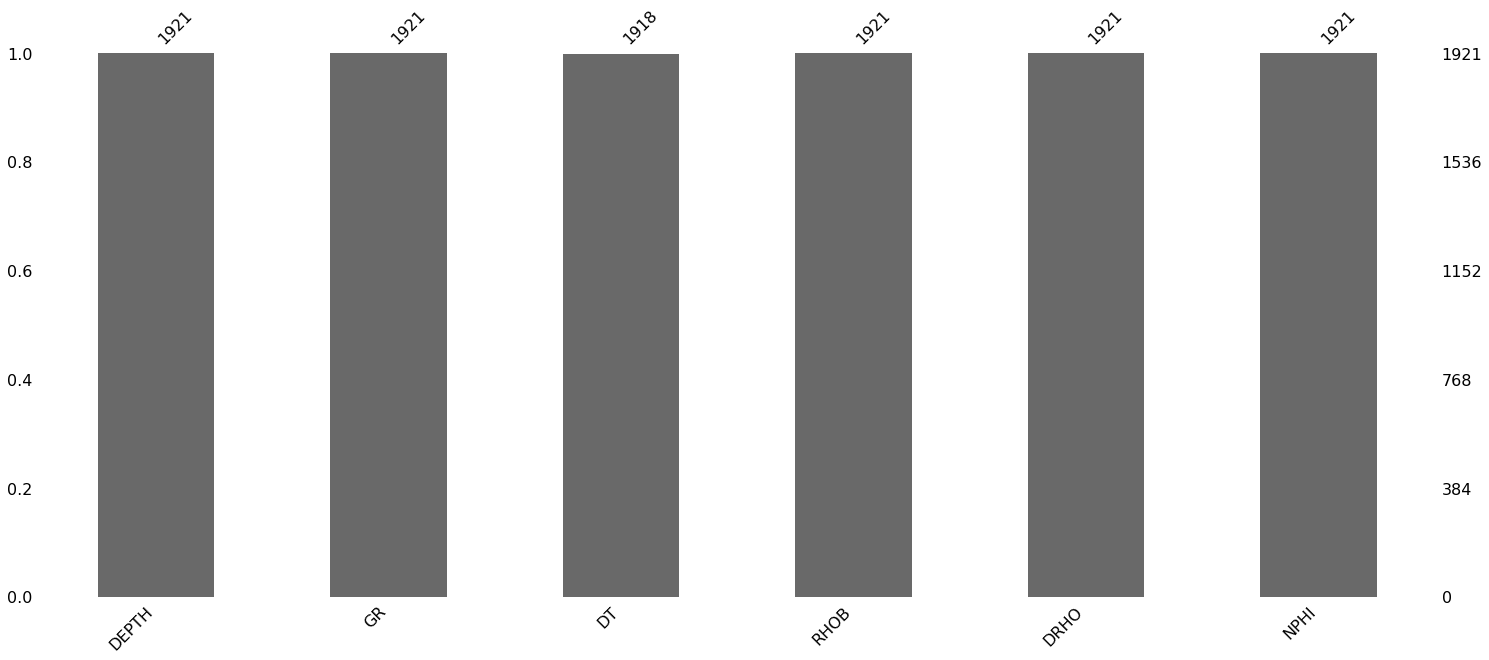

In [8]:
# barplot
msno.bar(well)

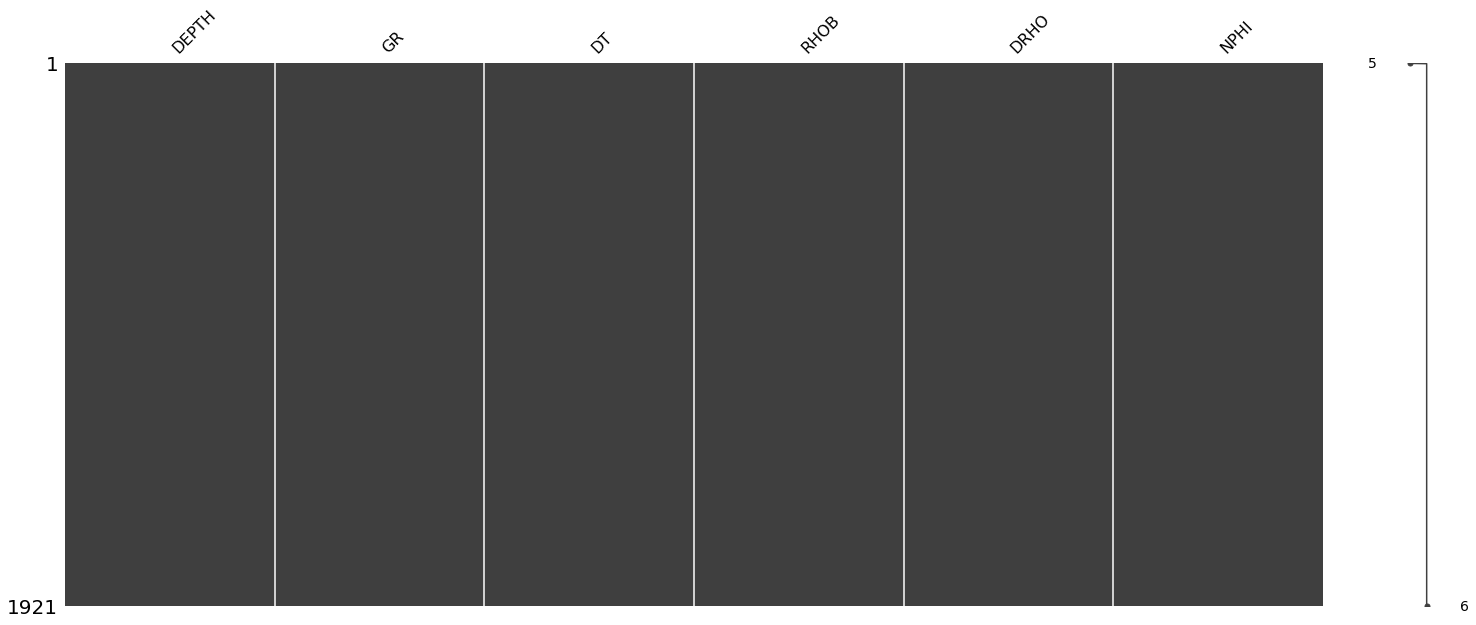

In [9]:
# matrix plot
msno.matrix(well)

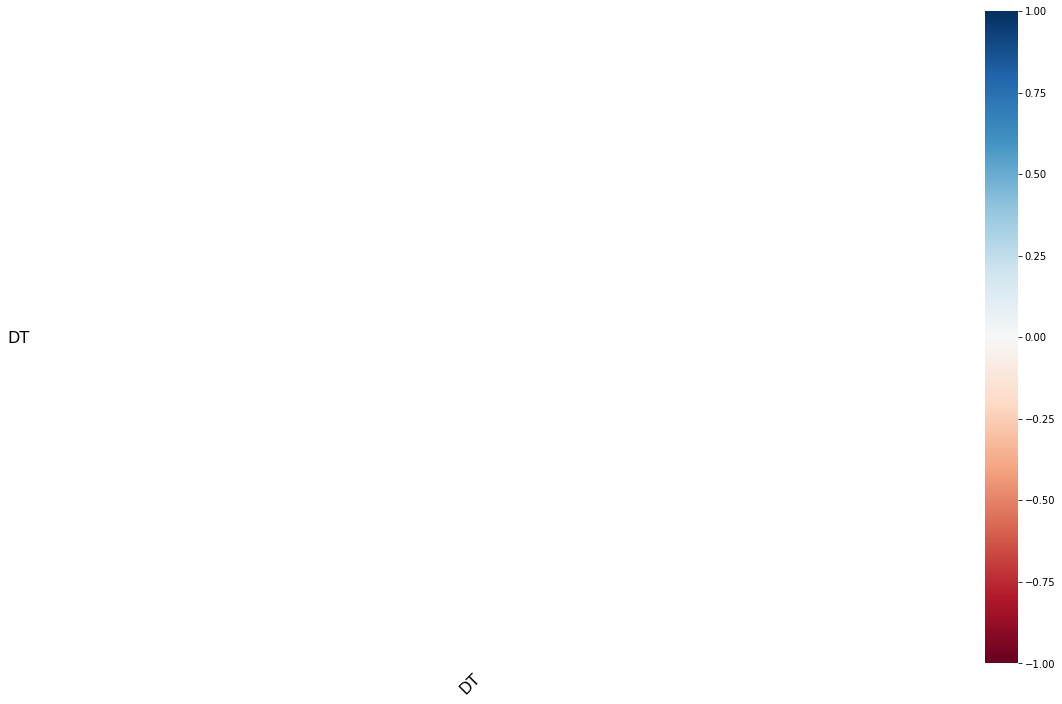

In [10]:
# Heatmap
msno.heatmap(well)

### Setting up the logplot

We can quickly make a log plot using subplot2grid from matplotlib. This allows us to space out multiple plots (tracks) in an easy to understand way. <br><br>

Each track is setup as an axis (ax for short)

In [11]:
well.describe()

,DEPTH,GR,DT,RHOB,DRHO,NPHI
count,1921.000000,1921.000000,1918.000000,1921.000000,1921.000000,1921.000000
mean,4705.800425,67.543849,67.398183,2.554064,0.020477,0.114056
std,55.468658,31.455753,4.525434,0.121438,0.045450,0.039322
min,4609.800800,19.605911,54.929482,1.947107,-0.132031,0.033476
25%,4657.800600,38.902794,64.324596,2.495097,-0.012742,0.092152
50%,4705.800400,63.487732,67.392708,2.557842,0.006896,0.111190
75%,4753.800200,95.923019,70.078076,2.647077,0.054896,0.128894
max,4801.800000,137.462921,89.620895,2.788836,0.134148,0.417384


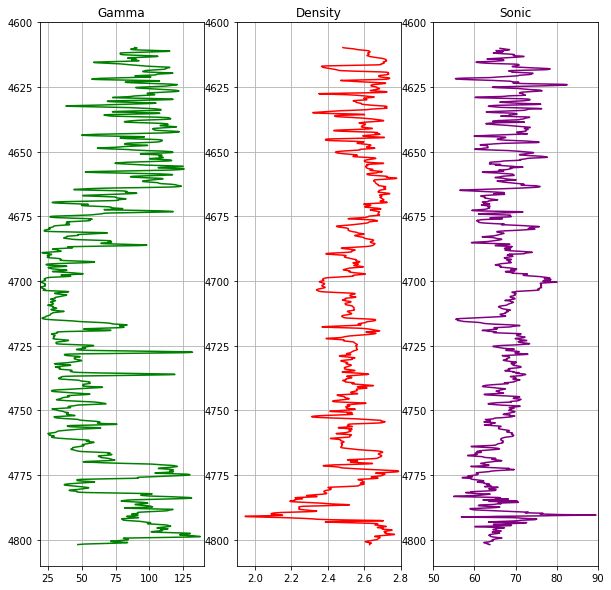

In [15]:
# define and initialize our subplot with the size
fig = plt.subplots(figsize=(10, 10))

# we define the various axes 
ax1 = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 3), (0, 1), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((1, 3), (0, 2), rowspan=1, colspan=1)

# Gamma ray track
ax1.plot('GR', 'DEPTH', data=well, color='green')
ax1.set_title('Gamma')
ax1.set_xlim(19, 140)
ax1.set_ylim(4810, 4600)
ax1.grid(True)

# Density track
ax2.plot('RHOB', 'DEPTH', data=well, color='red')
ax2.set_title('Density')
ax2.set_xlim(1.9, 2.8)
ax2.set_ylim(4810, 4600)
ax2.grid(True)

# Sonic Log Track
ax3.plot('DT', 'DEPTH', data=well, color='purple')
ax3.set_title('Sonic')
ax3.set_xlim(50, 90)
ax3.set_ylim(4810, 4600)
ax3.grid(True)

### Customizing the Log Plot
We can further customise the plot to look more like a familiar log plot, with the curve names and scales at the top and two curves (density & neutron) in the one track.

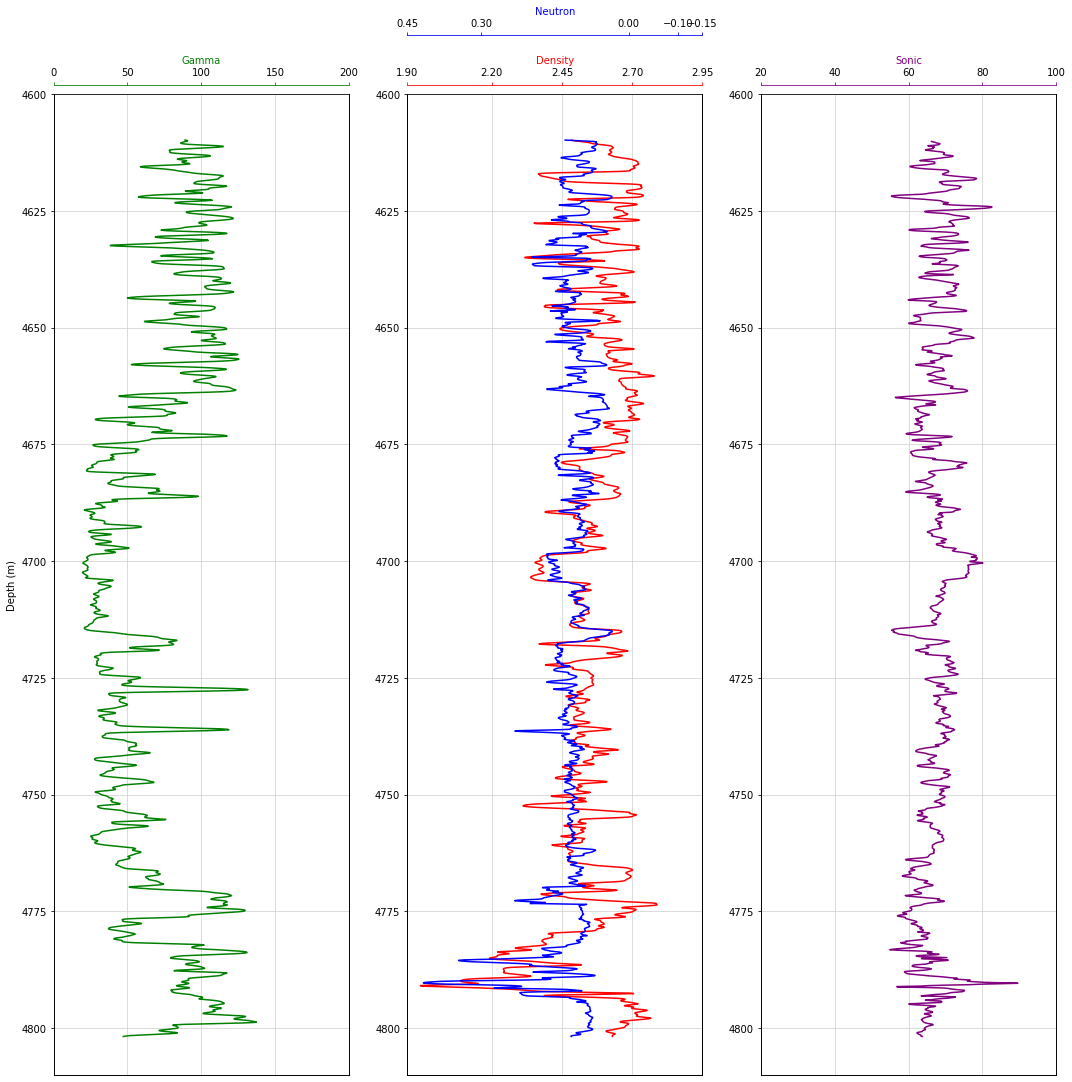

In [23]:
# define initialize our subplot with the size
fig, ax = plt.subplots(figsize=(15, 15))

# we define the various axes 
ax1 = plt.subplot2grid((1, 3), (0, 0), rowspan=1, colspan=1) # Gamma
ax2 = plt.subplot2grid((1, 3), (0, 1), rowspan=1, colspan=1) # Density (+ Neutron log)
ax3 = plt.subplot2grid((1, 3), (0, 2), rowspan=1, colspan=1) # Sonic log
ax4 = ax2.twiny() # The Neutron log to be added to the Density track

# We define twin tracks for others and set their visibility to False
ax5 = ax1.twiny()
ax5.xaxis.set_visible(False)
ax6 = ax2.twiny()
ax6.xaxis.set_visible(False)
ax7 = ax3.twiny()
ax7.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot('GR', 'DEPTH', data=well, color='green')
ax1.set_xlabel('Gamma')
ax1.xaxis.label.set_color('green')
ax1.set_xlim(19, 140)
ax1.set_ylabel('Depth (m)')
ax1.tick_params(axis='x', color='green')
ax1.spines['top'].set_edgecolor('green')
ax1.title.set_color('green')
ax1.set_xticks([0, 50, 100, 150, 200])

# Density track
ax2.plot('RHOB', 'DEPTH', data=well, color='red')
ax2.set_xlabel('Density')
ax2.xaxis.label.set_color('red')
ax2.set_xlim(1.9, 2.8)
ax2.tick_params(axis='x', color='red')
ax2.spines['top'].set_edgecolor('red')
ax2.title.set_color('red')
ax2.set_xticks([1.9, 2.2, 2.45, 2.70, 2.95])

# Sonic track
ax3.plot('DT', 'DEPTH', data=well, color='purple')
ax3.set_xlabel('Sonic')
ax3.xaxis.label.set_color('purple')
ax3.set_xlim(50, 90)
ax3.tick_params(axis='x', color='purple')
ax3.spines['top'].set_edgecolor('purple')
ax3.title.set_color('purple')
ax3.set_xticks([20, 40, 60, 80, 100])

# Neutron track on top of Density track
ax4.plot('NPHI', 'DEPTH', data=well, color='blue')
ax4.set_xlabel('Neutron')
ax4.xaxis.label.set_color('blue')
ax4.set_xlim(0.40, 0.03)
ax4.tick_params(axis='x', color='blue')
ax4.set_ylim(4810, 4600)
ax4.spines['top'].set_edgecolor('blue')
ax4.spines['top'].set_position(('axes', 1.06))
ax4.spines['top'].set_visible(True)
ax4.set_xticks([0.45, 0.3, 0, -0.1, -0.15])

# we loop through all the axes to add more common features
for ax in [ax1, ax2, ax3]:
    ax.set_ylim(4810, 4600)
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_label_position('top')
    ax.spines['top'].set_position(('axes', 1.01))
    
plt.tight_layout()

In [26]:
# fig.savefig('well_logplot.png')

..

..

# Conclusion and Next steps !

Further Data Modifications can then be carried out based on your research questions ! 

## Thank You !!